In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

Импортируем данные

In [125]:
data = pd.read_csv( 'geo.csv', delimiter = ';' )
data.head()

,Unnamed: 0,x,y,comment_class
0,0,"37,612416","55,777454",-1
1,1,"37,612416","55,777454",-1
2,2,"37,603298","55,742108",-1
3,3,"37,558526","55,728758",-1
4,4,"37,566431","55,731794",-1


Удаляем ненужную колонку индекса

In [126]:
del data['Unnamed: 0']

In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108806 entries, 0 to 108805
Data columns (total 3 columns):
x                108806 non-null object
y                108806 non-null object
comment_class    108806 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.5+ MB


In [128]:
data['x'] = data['x'].str.replace(',','.')

In [129]:
data['y'] = data['y'].str.replace(',','.')

In [130]:
data.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [131]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108806 entries, 0 to 108805
Data columns (total 3 columns):
x                108806 non-null object
y                108806 non-null object
comment_class    108806 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.5+ MB


Так как координаты представлены в текстовом формате, изменяем тип фичей на числовой с плавающей запятой

In [132]:
data.x = pd.to_numeric(data.x)

In [133]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108806 entries, 0 to 108805
Data columns (total 3 columns):
x                108806 non-null float64
y                108806 non-null object
comment_class    108806 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ MB


In [134]:
data.y = pd.to_numeric(data.y)

In [135]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108806 entries, 0 to 108805
Data columns (total 3 columns):
x                108806 non-null float64
y                108806 non-null float64
comment_class    108806 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.5 MB


Делаем из колонок с координатами матрицу

In [136]:
coords = data.as_matrix(columns=['x', 'y'])


In [137]:
coords

array([[ 37.612416,  55.777454],
       [ 37.612416,  55.777454],
       [ 37.603298,  55.742108],
       ..., 
       [ 37.421066,  55.848756],
       [ 37.448509,  55.793065],
       [ 37.451249,  55.83662 ]])

In [138]:
X = coords

In [122]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

In [17]:
from sklearn.metrics import  silhouette_score, adjusted_rand_score

Попробуем кластеризировать данные с помощью алгоритма KMeans, предварительно попытаемся визуально оценить оптимальное количество кластеров

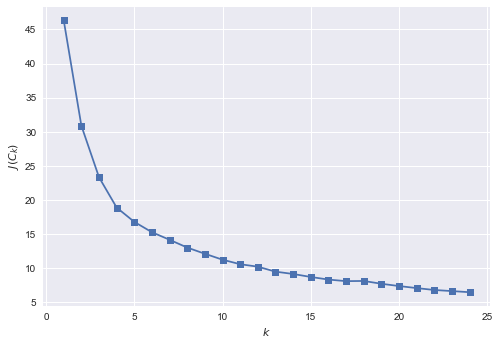

In [236]:
inertia = []
for k in range(1, 25):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 25), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

Видим, что примерно в точке 10 убывание замедляется, выберем в каечстве оптимального количества кластеров - 10

In [119]:
algo = KMeans(n_clusters = 10)

In [120]:
algo_pred = algo.fit_predict(X)


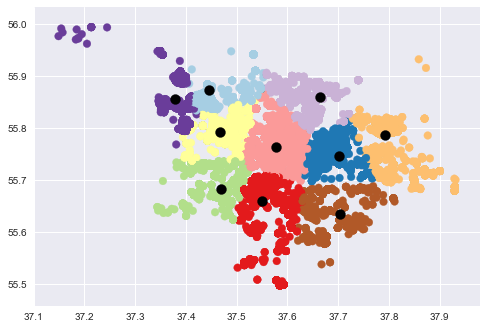

In [121]:
plt.figure()
plt.scatter(X[:,0],
            X[:,1],
            c=algo_pred,
            cmap = 'Paired',
            s=60)
plt.scatter(algo.cluster_centers_[:,0],
            algo.cluster_centers_[:,1],
            s =100,
            color = 'k')

Попробуем применить AgglomerativeClustering. Так как на полном датасете выдается ошибка памяти, обучим алгоритм на части данных

In [154]:
data2 = data.sample(n=20000, axis = 0, random_state = 0)

In [155]:
coords2 = data2.as_matrix(columns=['x', 'y'])

In [156]:
X2 = coords2

In [31]:
algo2 = AgglomerativeClustering(n_clusters = 10, linkage= 'average', affinity= 'l2')

In [32]:
algo2_pred = algo2.fit_predict(X2)

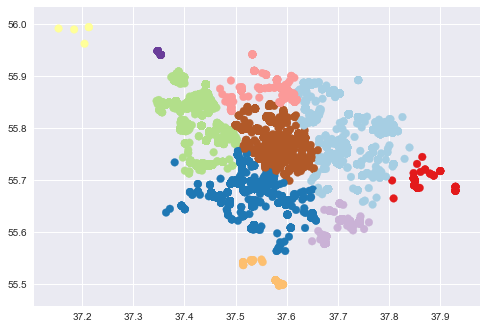

In [33]:
plt.figure()
plt.scatter(X2[:,0],
            X2[:,1],
            c=algo2_pred,
            cmap = 'Paired',
            s=60)


То же самое проделаем для DBSCAN

In [195]:
algo3 = DBSCAN(eps=0.1, metric='euclidian')

In [92]:
algo3_pred = algo3.fit_predict(X2)

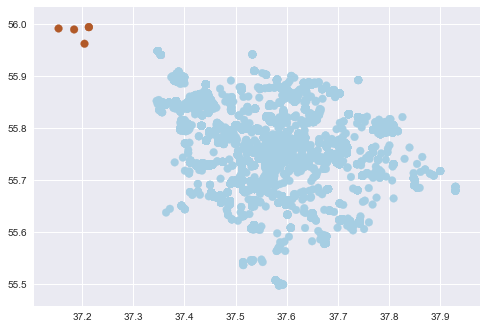

In [93]:
plt.figure()
plt.scatter(X2[:,0],
            X2[:,1],
            c=algo3_pred,
            cmap = 'Paired',
            s=60)

Отделим голосовавших "за" от голосовавших "против" и также разделим их на кластеры

In [159]:
sorted_data = data.sort_values(by = ['comment_class'])

In [164]:
voted = 1

In [197]:
df1 = data[data['comment_class'] == voted]
df1.head()

,x,y,comment_class
28,37.588916,55.741982,1
45,37.589311,55.734273,1
46,37.558526,55.728758,1
47,37.566431,55.731794,1
61,37.589311,55.734273,1


In [196]:
df2 = data[data['comment_class'] != voted]
df2.head()

,x,y,comment_class
0,37.612416,55.777454,-1
1,37.612416,55.777454,-1
2,37.603298,55.742108,-1
3,37.558526,55.728758,-1
4,37.566431,55.731794,-1


In [170]:
coords_df1 = df1.as_matrix(columns=['x', 'y'])

In [171]:
coords_df2 = df2.as_matrix(columns=['x', 'y'])

In [172]:
Xdf1= coords_df1

In [173]:
Xdf2= coords_df2

In [208]:
algo_df1 = KMeans(n_clusters = 10, random_state = 0)

In [209]:
algo_df2 = KMeans(n_clusters = 10, random_state= 0)

In [210]:
algo_df1_pred = algo_df1.fit_predict(Xdf1)

In [211]:
algo_df2_pred = algo_df2.fit_predict(Xdf2)

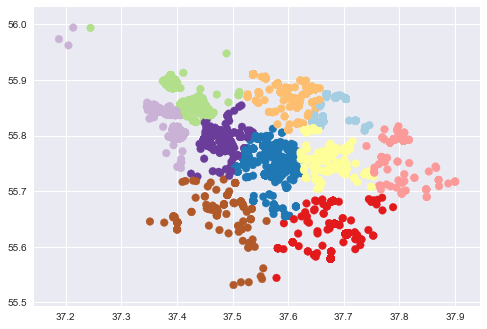

In [212]:
plt.figure()
plt.scatter(Xdf1[:,0],
            Xdf1[:,1],
            c=algo_df1_pred,
            cmap = 'Paired',
            s=60)


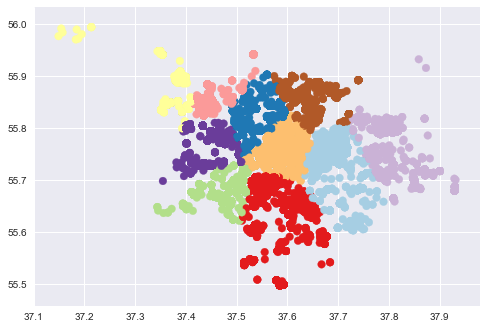

In [213]:
plt.figure()
plt.scatter(Xdf2[:,0],
            Xdf2[:,1],
            c=algo_df2_pred,
            cmap = 'Paired',
            s=60)


In [214]:
algo2_df1 = AgglomerativeClustering(n_clusters = 10, linkage= 'average', affinity= 'l2')

In [215]:
algo2_df2 = AgglomerativeClustering(n_clusters = 10, linkage= 'average', affinity= 'l2')

In [216]:
algo2_df1_pred = algo2_df1.fit_predict(Xdf1)

In [218]:
data2_df2 = df2.sample(n=20000, axis = 0, random_state = 0)

In [219]:
df2_2 = data2_df2.as_matrix(columns=['x', 'y'])

In [220]:
algo2_df2_pred = algo2_df2.fit_predict(df2_2)

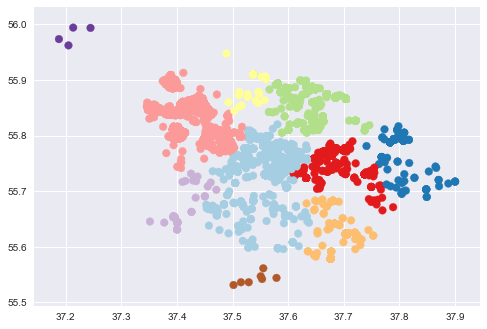

In [221]:
plt.figure()
plt.scatter(Xdf1[:,0],
            Xdf1[:,1],
            c=algo2_df1_pred,
            cmap = 'Paired',
            s=60)

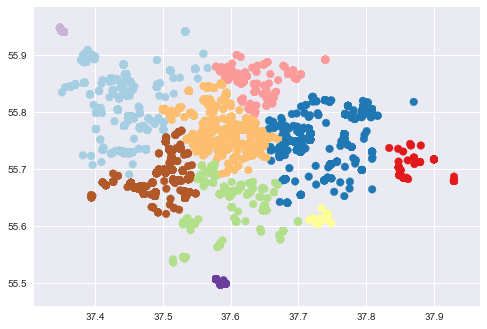

In [222]:
plt.figure()
plt.scatter(df2_2[:,0],
            df2_2[:,1],
            c=algo2_df2_pred,
            cmap = 'Paired',
            s=60)